/home/atriadplt2/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/atriadplt2/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/atriadplt2/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/atriadplt2/anaconda3/envs/py36/lib

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 24, 3)]  0                                            
__________________________________________________________________________________________________
conv1_convolution (Conv2D)      (None, 12, 12, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (MaxPooling2D)            (None

Found 424961 images belonging to 1591 classes.
Found 120531 images belonging to 1591 classes.
training: 
Epoch 1/40
13279/13280 [============================>.] - ETA: 0s - loss: 1.2217 - acc: 0.6865
Epoch 00001: val_loss improved from inf to 0.27796, saving model to tbe_cnn_ytd_adam.h5
13280/13280 [==============================] - 3936s 296ms/step - loss: 1.2217 - acc: 0.6865 - val_loss: 0.2780 - val_acc: 0.9350
Epoch 2/40
13279/13280 [============================>.] - ETA: 0s - loss: 1.0189 - acc: 0.7314
Epoch 00002: val_loss improved from 0.27796 to 0.20918, saving model to tbe_cnn_ytd_adam.h5
13280/13280 [==============================] - 3853s 290ms/step - loss: 1.0189 - acc: 0.7314 - val_loss: 0.2092 - val_acc: 0.9600
Epoch 3/40
13279/13280 [============================>.] - ETA: 0s - loss: 0.8675 - acc: 0.7665
Epoch 00003: val_loss improved from 0.20918 to 0.13835, saving model to tbe_cnn_ytd_adam.h5
13280/13280 [==============================] - 3853s 290ms/step - loss: 0.8675

13279/13280 [============================>.] - ETA: 0s - loss: 0.1904 - acc: 0.9507
Epoch 00029: val_loss did not improve from 0.04294
13280/13280 [==============================] - 3845s 290ms/step - loss: 0.1904 - acc: 0.9507 - val_loss: 0.0816 - val_acc: 0.9912
Epoch 30/40
13279/13280 [============================>.] - ETA: 0s - loss: 0.1958 - acc: 0.9503
Epoch 00030: val_loss improved from 0.04294 to 0.03386, saving model to tbe_cnn_ytd_adam.h5
13280/13280 [==============================] - 3848s 290ms/step - loss: 0.1958 - acc: 0.9503 - val_loss: 0.0339 - val_acc: 0.9925
Epoch 31/40
13279/13280 [============================>.] - ETA: 0s - loss: 0.1885 - acc: 0.9516
Epoch 00031: val_loss did not improve from 0.03386
13280/13280 [==============================] - 3843s 289ms/step - loss: 0.1885 - acc: 0.9516 - val_loss: 0.0491 - val_acc: 0.9912
Epoch 32/40
13279/13280 [============================>.] - ETA: 0s - loss: 0.1903 - acc: 0.9517
Epoch 00032: val_loss did not improve from 0

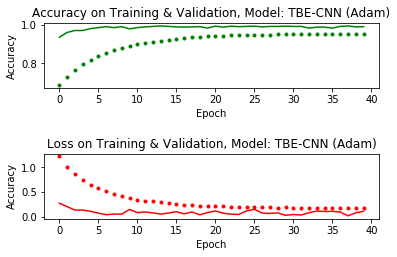

In [1]:
import model_3_branch
import common_function
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
import os
import asyncio
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.models import load_model, Model

# Just disables the warning, doesn't enable AVX/FMA (no GPU)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

epochs = 40
l_rate = 1.0e-4
decay = l_rate / epochs
adam = Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
batch_size = 32
img_width, img_height = 24, 24
path_data_set = './ytd'
input_img, merged = model_3_branch.get_model(img_width, img_height)
num_train_images = 424961  # training images: 424961  # total images: 605855
file_path = 'tbe_cnn_ytd_adam.h5'


datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


############################################### Training Dataset #############################################################


if not os.path.exists(file_path):
    flatten = Flatten()(merged)
    dense = Dense(64)(flatten)
    activation = Activation('softmax')(dense)
    dropout = Dropout(0.5)(activation)
    dense = Dense(1591)(dropout)
    activation = Activation('softmax')(dense)

    base_model = Model(input_img, activation)
else:
    base_model = load_model(file_path)
    # base_model.load_weights(file_path)

base_model.summary()

train_generator_lr = datagen.flow_from_directory(
    str(path_data_set + '/train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator_lr = datagen.flow_from_directory(
    str(path_data_set + '/validate'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

print('training: ')

base_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    file_path,
    monitor='val_loss',
    save_best_only=True,
    mode='auto',
    verbose=1
)
callbacks_list = [checkpoint]

history = base_model.fit_generator(
    generator=train_generator_lr,
    steps_per_epoch=num_train_images // batch_size,
    epochs=epochs,
    validation_data=validation_generator_lr,
    validation_steps=800 // batch_size,
    callbacks=callbacks_list
)

common_func = common_function.CommonFunction()
common_func.plot_training(history, 'TBE-CNN (Adam)')
